In this notebook, we attempt to create a new dataset that further divides the satellite images, as suggested by the [paper](https://arxiv.org/abs/2308.12061).

In [12]:
# import packages
import cv2
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np

Let us first try on one image.

In [9]:
def load_geotiff(file):
    ds = gdal.Open(file)
    band1 = ds.GetRasterBand(1).ReadAsArray() # Red channel
    band2 = ds.GetRasterBand(2).ReadAsArray() # Green channel
    band3 = ds.GetRasterBand(3).ReadAsArray() # Blue channel
    img = np.dstack((band1, band2, band3))
    return img

In [21]:
path = "../dataset/skysat_images/215.tif"

In [22]:
image = load_geotiff(path)

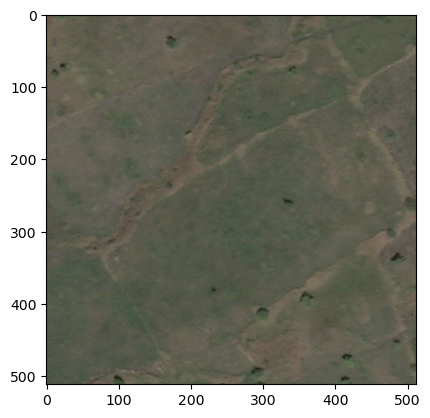

In [23]:
plt.imshow(image)

In [24]:
original_image = cv2.imread(path)

In [25]:
original_image.shape

(512, 512, 3)

In [27]:
# Define the size of each patch
patch_size = (256, 256)

Let us try dividing the image into 4 images.

In [28]:
patches = []
for y in range(0, original_image.shape[0], patch_size[0]):
    for x in range(0, original_image.shape[1], patch_size[1]):
        patch = original_image[y:y+patch_size[0], x:x+patch_size[1]]
        patches.append(patch)

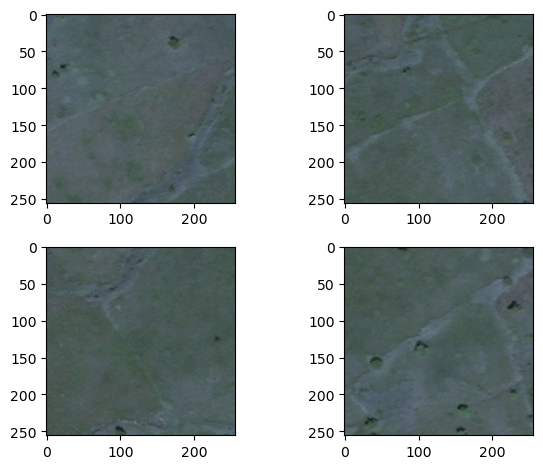

In [49]:
plt.figure()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(patches[i])
    # plt.axis('off')
plt.tight_layout()

Now, let us try to upscale them.

In [50]:
upscaled_patches = []
for patch in patches:
    upscaled_patch = cv2.resize(patch, (patch_size[1]*2, patch_size[0]*2), interpolation=cv2.INTER_LINEAR)
    upscaled_patches.append(upscaled_patch)

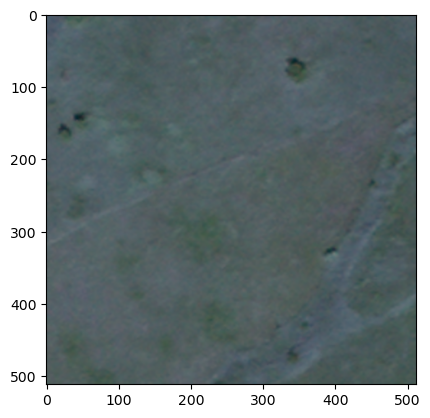

In [51]:
plt.imshow(upscaled_patches[0])

In [52]:
print(f"Original: {patches[0].shape}, Upscaled: {upscaled_patches[0].shape}")

Original: (256, 256, 3), Upscaled: (512, 512, 3)
